After conducting EDA between Promo and Promo2, it looks like Promotions did't not make a big difference in sales per customer

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone3/data') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone3/Notebook
/Users/liuyang/Desktop/Springboard_Capstone3/Data


In [3]:
newstoredata = pd.read_csv('combined_data.csv')

In [4]:
import sys
sys.path.insert(1, '/Users/liuyang/Desktop/Springboard_Capstone3/notebook')
import eda

In [5]:
from eda import data_process, Sales_EDA, sumby, individual_store, combined_storedata, combined_store_EDA

## Promo by Store Type

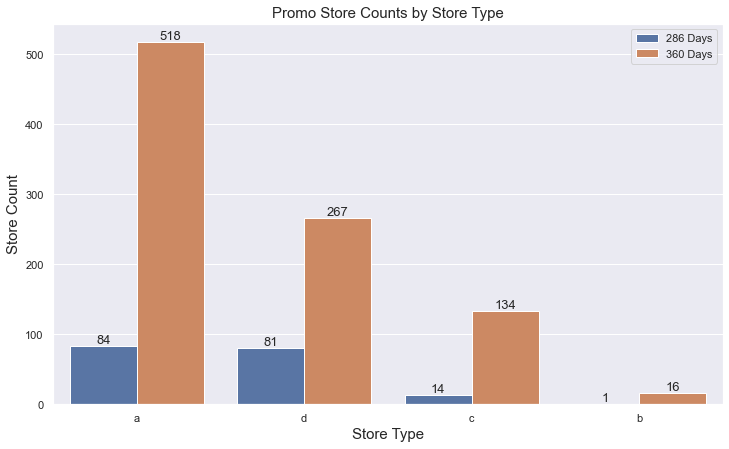

In [6]:
plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.countplot('StoreType', hue='Promo', data=newstoredata, order= newstoredata['StoreType'].value_counts().index)
ax.set_xlabel('Store Type',fontsize=15)
ax.set_ylabel('Store Count',fontsize=15)
#ax.set_suptitle('Variable vs Target')
ax.legend(['286 Days', '360 Days'])

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()


    ax.text(left.get_x() + left.get_width()/2., height_l + 3, '{}'.format(height_l), ha="center",fontsize=13)
    ax.text(right.get_x() + right.get_width()/2., height_r + 3, '{}'.format(height_r), ha="center",fontsize=13)

plt.title('Promo Store Counts by Store Type', fontsize=15)
plt.show()

## Promo and Sales

In [7]:
newstoredata_eda = combined_store_EDA(newstoredata)
newstoredata_eda.type_summary('Promo', 'Sales')

Promo,286,360
count,1.800000e+02,9.350000e+02
mean,4.124232e+06,5.487507e+06
std,1.277245e+06,1.982016e+06
min,2.306075e+06,2.114322e+06
25%,3.316243e+06,4.163445e+06
50%,3.866940e+06,5.228649e+06
75%,4.760438e+06,6.311646e+06
max,1.155352e+07,1.951684e+07


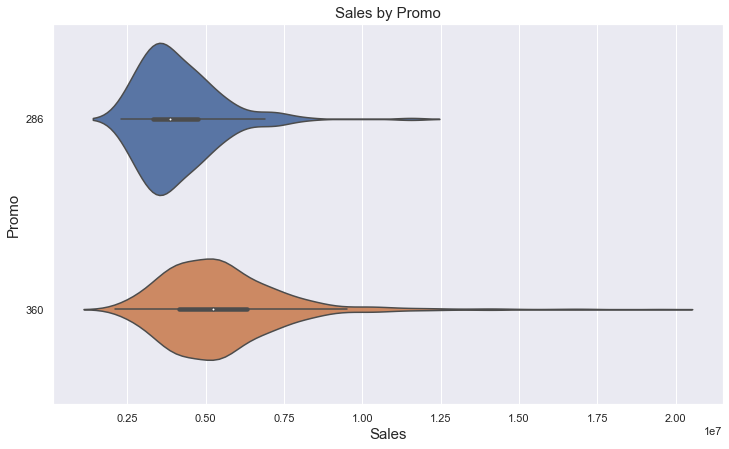

In [8]:
newstoredata_eda.type_violinplot('Sales','Promo')

## Promo and AverageDailySales

In [9]:
newstoredata_eda.type_summary('Promo', 'AverageDailySales')

Promo,286,360
count,180.000000,935.000000
mean,6633.909899,6992.019934
std,2063.888181,2437.454395
min,3707.516077,2703.736573
25%,5331.580788,5319.399815
50%,6167.081014,6672.844388
75%,7645.617873,8028.343937
max,18574.795820,21757.483418


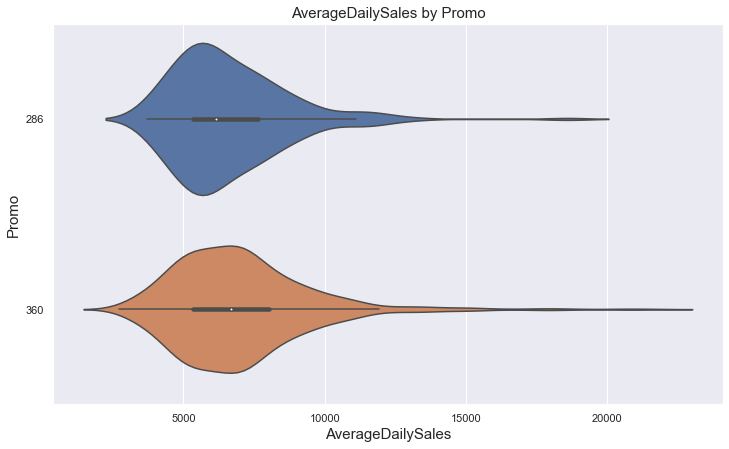

In [10]:
newstoredata_eda.type_violinplot('AverageDailySales','Promo')

## Promo and AverageDailyCustomer

In [11]:
newstoredata_eda.type_summary('Promo', 'AverageDailyCustomer')

Promo,286,360
count,180.000000,935.000000
mean,630.230475,778.435658
std,222.273321,368.640162
min,314.654341,240.183099
25%,483.828376,558.255412
50%,580.501608,697.191327
75%,707.197749,886.404580
max,1657.932584,3403.458599


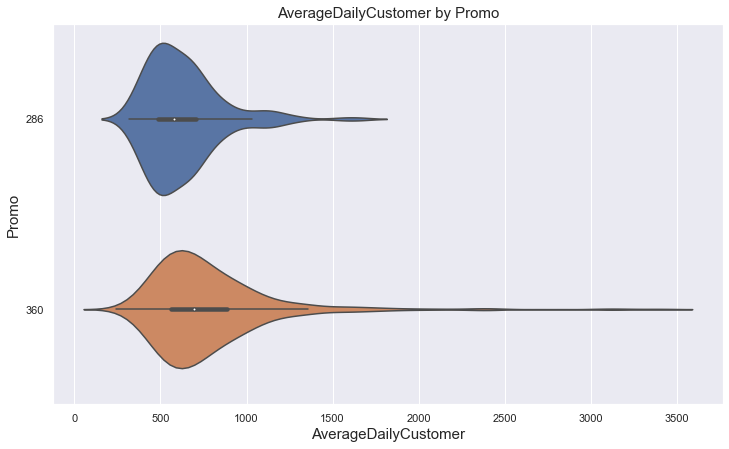

In [12]:
newstoredata_eda.type_violinplot('AverageDailyCustomer','Promo')

## Promo and SalesPerCustomer

In [13]:
newstoredata_eda.type_summary('Promo', 'SalesPerCustomer')

Promo,286,360
count,180.000000,935.000000
mean,10.836935,9.414053
std,2.000508,1.901108
min,4.278804,3.513703
25%,9.392257,8.032644
50%,10.946310,9.250408
75%,12.348831,10.692246
max,16.162639,15.912881


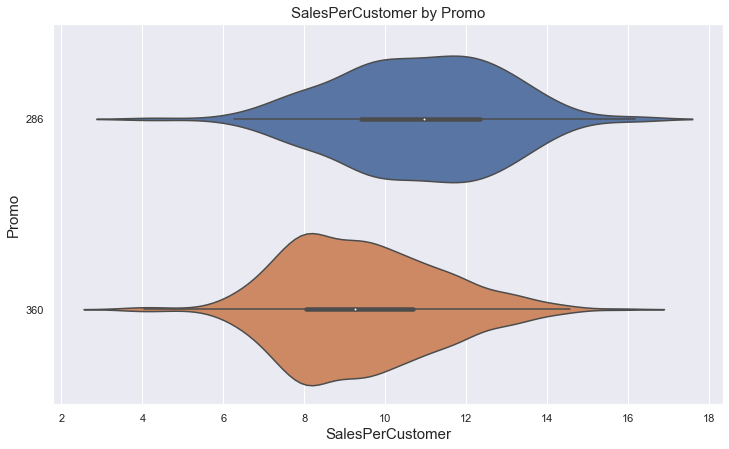

In [14]:
newstoredata_eda.type_violinplot('SalesPerCustomer','Promo')

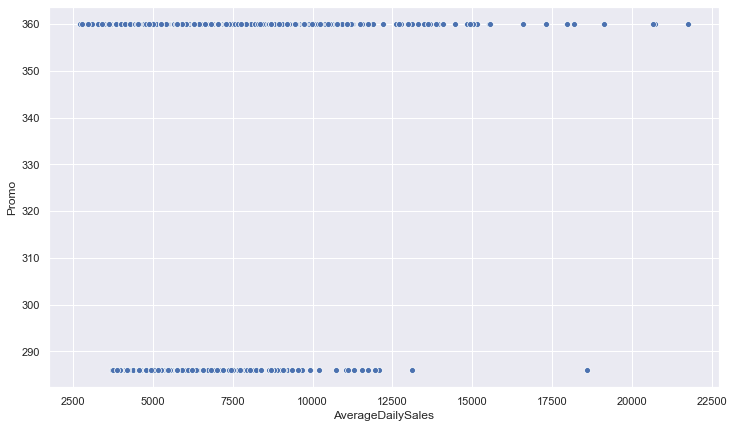

In [15]:
sns.scatterplot(y=newstoredata.Promo,x=newstoredata.AverageDailySales)
plt.show()

# Stores that had 360 days of promotion (over 942 days) have higher average daily sales than stores that had 286 days of promotion

## Promo2 by Store Type
Promo2 is a continuing and consecutive promotion

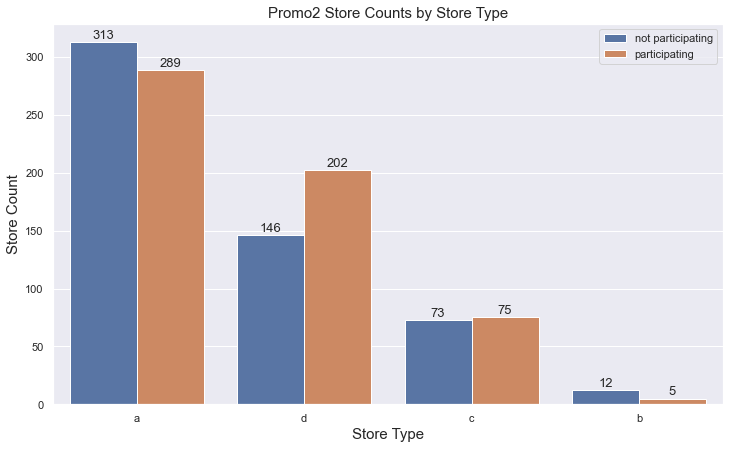

In [16]:
ax = sns.countplot('StoreType', hue='Promo2', data=newstoredata, order= newstoredata['StoreType'].value_counts().index)
ax.set_xlabel('Store Type',fontsize=15)
ax.set_ylabel('Store Count',fontsize=15)
#ax.set_suptitle('Variable vs Target')
ax.legend(['not participating', 'participating'])

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()


    ax.text(left.get_x() + left.get_width()/2., height_l + 3, '{}'.format(height_l), ha="center",fontsize=13)
    ax.text(right.get_x() + right.get_width()/2., height_r + 3, '{}'.format(height_r), ha="center",fontsize=13)

plt.title('Promo2 Store Counts by Store Type', fontsize=15)
plt.show()

## Promo2 and AverageDailySales

In [17]:
newstoredata_eda.type_summary('Promo2', 'AverageDailySales')

Promo2,0,1
count,544.000000,571.000000
mean,7337.391682,6550.089921
std,2730.370096,1924.083418
min,2703.736573,2900.604859
25%,5630.471823,5156.033462
50%,6936.306575,6267.489060
75%,8416.886746,7638.262555
max,21757.483418,16574.816431


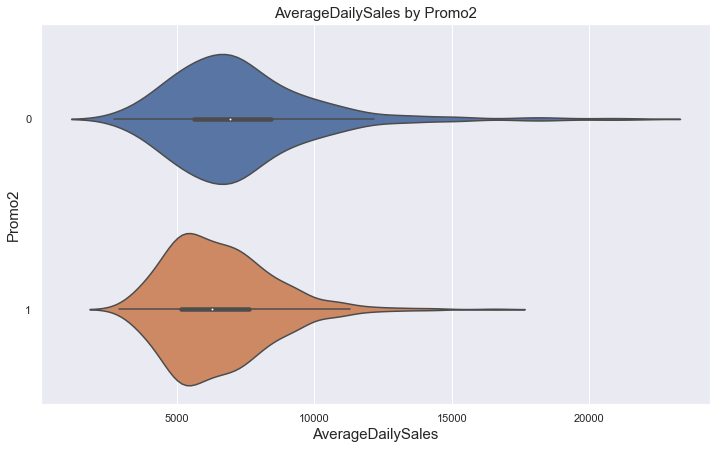

In [18]:
newstoredata_eda.type_violinplot('AverageDailySales','Promo2')


## Promo2 and AverageDailyCustomer

In [19]:
newstoredata_eda.type_summary('Promo2', 'AverageDailyCustomer')

Promo2,0,1
count,544.000000,571.000000
mean,836.808934,676.102917
std,403.903462,275.638340
min,240.183099,258.673941
25%,599.826849,504.179997
50%,737.438961,620.405648
75%,937.108678,764.809824
max,3403.458599,3081.052017


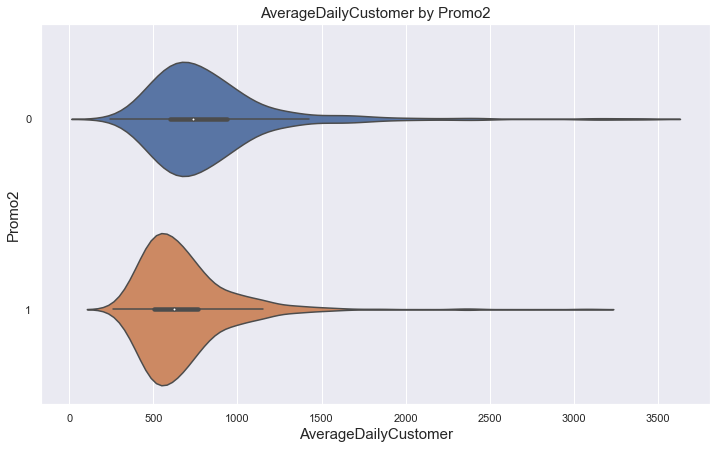

In [20]:
newstoredata_eda.type_violinplot('AverageDailyCustomer','Promo2')

## Promo2 and SalesPerCustomer

In [21]:
newstoredata_eda.type_summary('Promo2', 'SalesPerCustomer')

Promo2,0,1
count,544.000000,571.000000
mean,9.136827,10.126714
std,1.770858,2.061271
min,4.025161,3.513703
25%,7.896896,8.500811
50%,8.973724,9.954110
75%,10.298135,11.692336
max,16.162639,16.068928


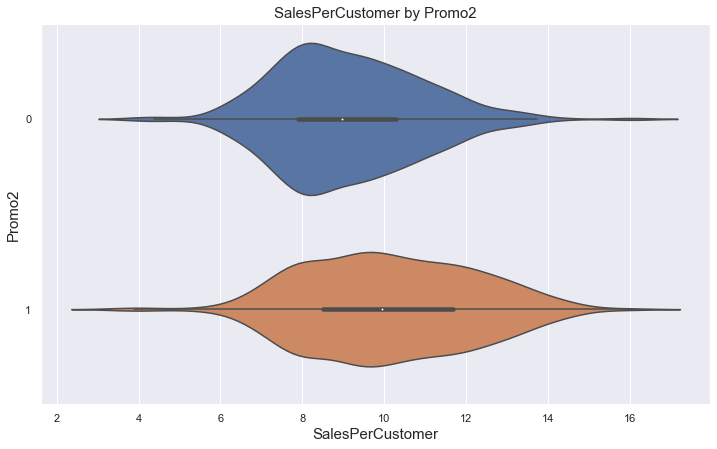

In [22]:
newstoredata_eda.type_violinplot('SalesPerCustomer','Promo2')

# Stores that doesn't participat in continuing Promo have higher average sales than stores that do participat. Because of the outliers? 
# On the other hand, stores that participate in continuing Promo have higher SalesPerCustomer.

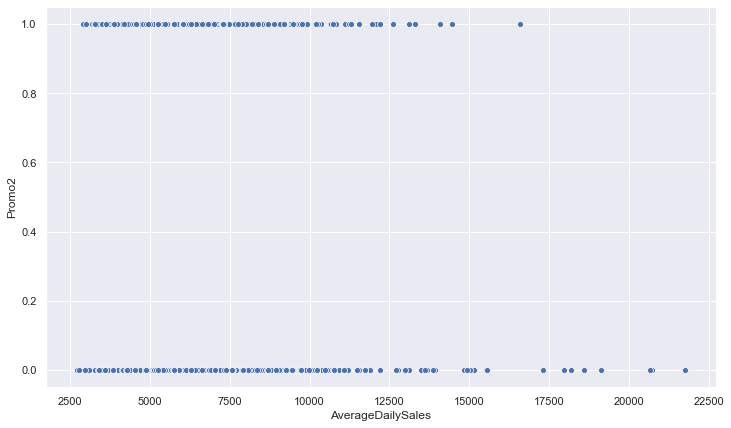

In [23]:
sns.scatterplot(y=newstoredata.Promo2,x=newstoredata.AverageDailySales)
plt.show()

## School Holiday and AverageSales

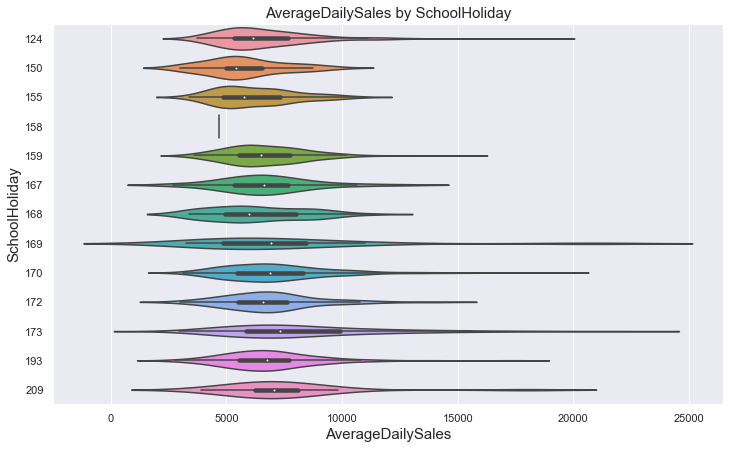

In [24]:
newstoredata_eda.type_violinplot('AverageDailySales','SchoolHoliday')

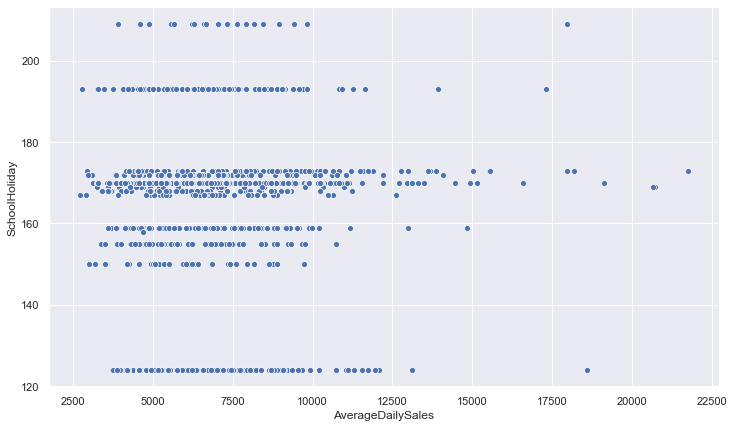

In [25]:
sns.scatterplot(y=newstoredata.SchoolHoliday,x=newstoredata.AverageDailySales)
plt.show()

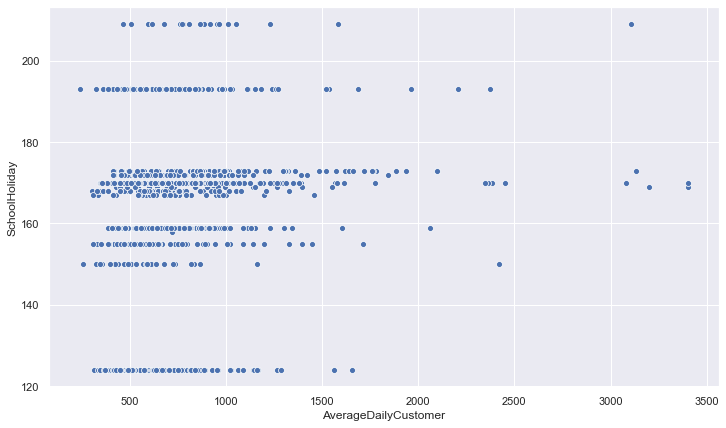

In [26]:
sns.scatterplot(y=newstoredata.SchoolHoliday,x=newstoredata.AverageDailyCustomer)
plt.show()